# ---------- POC -----------
# Phase 2 - Regressor to predict death time for in-hospital mortality

In the POC stage, we have explored the feasibility of using a regressor instead of a multiclass classifier in Phase 2 to predict death time in hours for in-hospital mortality. This notebook presents some of the findings of training a RandomForestRegressor using 6-hour ICU data.

* Part 1. Grid Search of RandomForestRegressor on 5-fold CV
* Part 2. Feature importance

In [2]:
# import pandas as pd
# import numpy as np
# from scipy import interp
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer, Imputer
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# from sklearn.metrics import *
# import sklearn.multiclass
# from itertools import cycle
# import matplotlib
# import matplotlib.pyplot as plt
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'
# matplotlib.rcParams.update({'font.size': 16})


# # see regressor_pipeline.py
from regressor_pipeline import fit_gridsearch_pipeline
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams.update({'font.size': 16})
plt.style.use('ggplot')

---
## Part 1: Grid Search of RandomForestRegressor on 5-fold CV

* We have defined a machine learning pipieline for grid search of RandomForestRegressor on 5-fold CV in `regressor_pipeline.py`. In gist, the pipeline is similar to the multipclass classifier in `Phase2_model.ipynb`, except that we have used RandomForestRegressor and add some evaluation metrics for regressor this time.
* First, we want to compare the model performance of the regressor to the multiclass classifier in Phase 2 trained on 6-hour ICU data using the same set of features (123 features).

In [5]:
# load data
df_6hr = pd.read_csv('../data/mp_data_6hr.csv')

# define numerical features
numerical_features = ['age', 'icustay_num',
                       'heartrate_mean', 'sysbp_mean', 'diasbp_mean', 'meanbp_mean',
                       'resprate_mean', 'tempc_mean', 'spo2_mean', 'glucose_mean', 
                       'heartrate_min', 'sysbp_min', 'diasbp_min','meanbp_min', 
                       'resprate_min', 'tempc_min', 'spo2_min', 'glucose_min',
                       'heartrate_max', 'sysbp_max', 'diasbp_max', 'meanbp_max',
                       'resprate_max', 'tempc_max', 'spo2_max', 'glucose_max', 
                       'gcs_mean', 'gcsmotor_mean', 'gcsverbal_mean', 'gcseyes_mean', 'endotrachflag_mean',
                       'gcs_min', 'gcsmotor_min', 'gcsverbal_min', 'gcseyes_min', 'endotrachflag_min', 
                       'gcs_max', 'gcsmotor_max', 'gcsverbal_max', 'gcseyes_max', 'endotrachflag_max', 
                       'baseexcess_mean', 'carboxyhemoglobin_mean', 'methemoglobin_mean', 
                       'po2_mean', 'pco2_mean', 'ph_mean', 'pao2fio2ratio_mean', 'totalco2_mean', 
                       'aniongap_mean', 'albumin_mean', 'bands_mean', 'bicarbonate_mean', 
                       'bilirubin_mean', 'calcium_mean', 'creatinine_mean', 'chloride_mean', 
                       'hematocrit_mean', 'hemoglobin_mean', 'lactate_mean', 'platelet_mean', 
                       'potassium_mean', 'ptt_mean', 'inr_mean', 'sodium_mean', 'bun_mean', 'wbc_mean',
                       'baseexcess_min', 'carboxyhemoglobin_min', 'methemoglobin_min',
                       'po2_min', 'pco2_min', 'ph_min', 'pao2fio2ratio_min', 'totalco2_min',
                       'aniongap_min', 'albumin_min', 'bands_min', 'bicarbonate_min',
                       'bilirubin_min', 'calcium_min', 'creatinine_min', 'chloride_min',
                       'hematocrit_min', 'hemoglobin_min', 'lactate_min', 'platelet_min',
                       'potassium_min', 'ptt_min', 'inr_min', 'sodium_min', 'bun_min', 'wbc_min', 
                       'baseexcess_max', 'carboxyhemoglobin_max', 'methemoglobin_max', 
                       'po2_max', 'pco2_max', 'ph_max', 'pao2fio2ratio_max', 'totalco2_max',          
                       'aniongap_max', 'albumin_max', 'bands_max', 'bicarbonate_max', 
                       'bilirubin_max', 'calcium_max', 'creatinine_max', 'chloride_max', 
                       'hematocrit_max', 'hemoglobin_max', 'lactate_max', 'platelet_max', 
                       'potassium_max', 'ptt_max', 'inr_max', 'sodium_max', 'bun_max', 'wbc_max', 
                       'urineoutput']

# fit grid search pipeline
grid_search = fit_gridsearch_pipeline(df_6hr, numerical_features, metric='r2') # metric = 'neg_mean_absolute_error'

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 12.6min finished



Grid Search Best parameters set :
{'algorithm__bootstrap': False, 'algorithm__max_depth': 30, 'algorithm__max_features': 'log2', 'algorithm__n_estimators': 500}

Best score: 0.217

Evaluation on Training Set (80%) :
R2 Score:  0.9988711955351566
Mean Absolute Error:  3.8782931946030934
Accuracy: 0.9809794490599038
ROC AUC for Class  0 :  0.9454112637879729
ROC AUC for Class  1 :  0.9827455214912081
ROC AUC for Class  2 :  0.9971303495781172
Micro-average ROC AUC:  0.9857345867949278
Macro-average ROC AUC:  0.9750957116190994

Evaluation on Test Set (20%) :
R2 Score:  0.21058361473547016
Mean Absolute Error:  183.6848544420098
Accuracy: 0.4991258741258741
ROC AUC for Class  0 :  0.5249711213934009
ROC AUC for Class  1 :  0.5223460542609478
ROC AUC for Class  2 :  0.6006307757734919
Micro-average ROC AUC:  0.6243444055944056
Macro-average ROC AUC:  0.5493159838092803


* Recall that the multiclass classifier trained on 6-hour ICU data has micro-average ROC AUC = 0.77 and macro-average ROC AUC = 0.72 (see `Phase2_model.ipynb`). Our regressor doesn't perform better than the multiclass classifer. Looking into R^2 of the training set and test set, it seems that there is overfitting as well.
* Next, we want to cut down the number of features to see if we could avoid overfitting. Specifically, we just use the mean of numerical features over the ICU hours this time. 

In [4]:
# load data
# df_6hr = pd.read_csv('../data/mp_data_6hr.csv')

# define numerical features
numerical_features = ['age', 'icustay_num',
                       'heartrate_mean', 'sysbp_mean', 'diasbp_mean', 'meanbp_mean',
                       'resprate_mean', 'tempc_mean', 'spo2_mean', 'glucose_mean', 
                       'gcs_mean', 'gcsmotor_mean', 'gcsverbal_mean', 'gcseyes_mean', 'endotrachflag_mean',
                       'baseexcess_mean', 'carboxyhemoglobin_mean', 'methemoglobin_mean', 
                       'po2_mean', 'pco2_mean', 'ph_mean', 'pao2fio2ratio_mean', 'totalco2_mean', 
                       'aniongap_mean', 'albumin_mean', 'bands_mean', 'bicarbonate_mean', 
                       'bilirubin_mean', 'calcium_mean', 'creatinine_mean', 'chloride_mean', 
                       'hematocrit_mean', 'hemoglobin_mean', 'lactate_mean', 'platelet_mean', 
                       'potassium_mean', 'ptt_mean', 'inr_mean', 'sodium_mean', 'bun_mean', 'wbc_mean',
                       'urineoutput']

# fit grid search pipeline
grid_search = fit_gridsearch_pipeline(df_6hr, numerical_features, metric='r2')

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  6.0min finished



Grid Search Best parameters set :
{'algorithm__bootstrap': False, 'algorithm__max_depth': 30, 'algorithm__max_features': 'log2', 'algorithm__n_estimators': 250}

Best score: 0.205

Evaluation on Training Set (80%) :
R2 Score:  0.9988213583582762
Mean Absolute Error:  3.931893883038355
Accuracy: 0.980104940970704
ROC AUC for Class  0 :  0.9454112637879729
ROC AUC for Class  1 :  0.9818599168646884
ROC AUC for Class  2 :  0.996224561086661
Micro-average ROC AUC:  0.9850787057280279
Macro-average ROC AUC:  0.9744985805797741

Evaluation on Test Set (20%) :
R2 Score:  0.17824626673350696
Mean Absolute Error:  185.8878498282944
Accuracy: 0.506993006993007
ROC AUC for Class  0 :  0.5154169812660123
ROC AUC for Class  1 :  0.5366086282161933
ROC AUC for Class  2 :  0.6052839887875883
Micro-average ROC AUC:  0.6302447552447553
Macro-average ROC AUC:  0.5524365327565979


---
## Part 2. Feature Importance

* Part 1 shows that the multiclass classifer performs better than the regressor in terms of micro-average and macro-average ROC AUC.
* In this part, we want to dive deeper to see the feature importance of the trained regressor. Let's us retrain the regressor with the best parameter set resulted from the grid search in Part 1.

In [8]:
# load data
# df_6hr = pd.read_csv('../data/mp_data_6hr.csv')
df_dead = df_6hr[(df_6hr.hospital_expire_flag==1) & (df_6hr.hosp_deathtime_hours>=0)]

# define features
categorical_features = ['gender', 'ethnicity', 'admission_type']
numerical_features = ['age', 'icustay_num',
                       'heartrate_mean', 'sysbp_mean', 'diasbp_mean', 'meanbp_mean',
                       'resprate_mean', 'tempc_mean', 'spo2_mean', 'glucose_mean', 
                       'gcs_mean', 'gcsmotor_mean', 'gcsverbal_mean', 'gcseyes_mean', 'endotrachflag_mean',
                       'baseexcess_mean', 'carboxyhemoglobin_mean', 'methemoglobin_mean', 
                       'po2_mean', 'pco2_mean', 'ph_mean', 'pao2fio2ratio_mean', 'totalco2_mean', 
                       'aniongap_mean', 'albumin_mean', 'bands_mean', 'bicarbonate_mean', 
                       'bilirubin_mean', 'calcium_mean', 'creatinine_mean', 'chloride_mean', 
                       'hematocrit_mean', 'hemoglobin_mean', 'lactate_mean', 'platelet_mean', 
                       'potassium_mean', 'ptt_mean', 'inr_mean', 'sodium_mean', 'bun_mean', 'wbc_mean',
                       'urineoutput']
features = categorical_features + numerical_features 

# impute missing values of numerical features with median
for col in numerical_features:
    df_dead[col].fillna(df_dead[col].median(), inplace=True)
    
# encoding categorical features
le_gender = LabelEncoder()
df_dead['gender'] = le_gender.fit_transform(df_dead.gender)
le_enthnicity = LabelEncoder()
df_dead['ethnicity'] = le_enthnicity.fit_transform(df_dead.ethnicity)
le_admission_type = LabelEncoder()
df_dead['admission_type'] = le_admission_type .fit_transform(df_dead.admission_type )

# train-test split
y = df_dead.hosp_deathtime_hours
X = df_dead[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train regressor
regr = RandomForestRegressor(n_estimators=500, 
                              max_features="log2",
                              max_depth=30,
                              bootstrap=False,
                              random_state=0, n_jobs=-1)
regr.fit(X_train, y_train)

# evaluation
y_test_pred = regr.predict(X_test)
y_train_pred = regr.predict(X_train)
print('R2 score on training set and test set: ', r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
print('MAE on training set and test set: ', mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred))

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/li

R2 score on training set and test set:  0.9989815695822264 0.19599089150452742
MAE on training set and test set:  3.7071235789286305 181.08019295887493


Top 10 features
hematocrit_mean    0.040362
spo2_mean          0.035523
sysbp_mean         0.034285
hemoglobin_mean    0.033659
resprate_mean      0.033344
diasbp_mean        0.033044
platelet_mean      0.032917
tempc_mean         0.032256
meanbp_mean        0.031555
bilirubin_mean     0.031524
dtype: float64


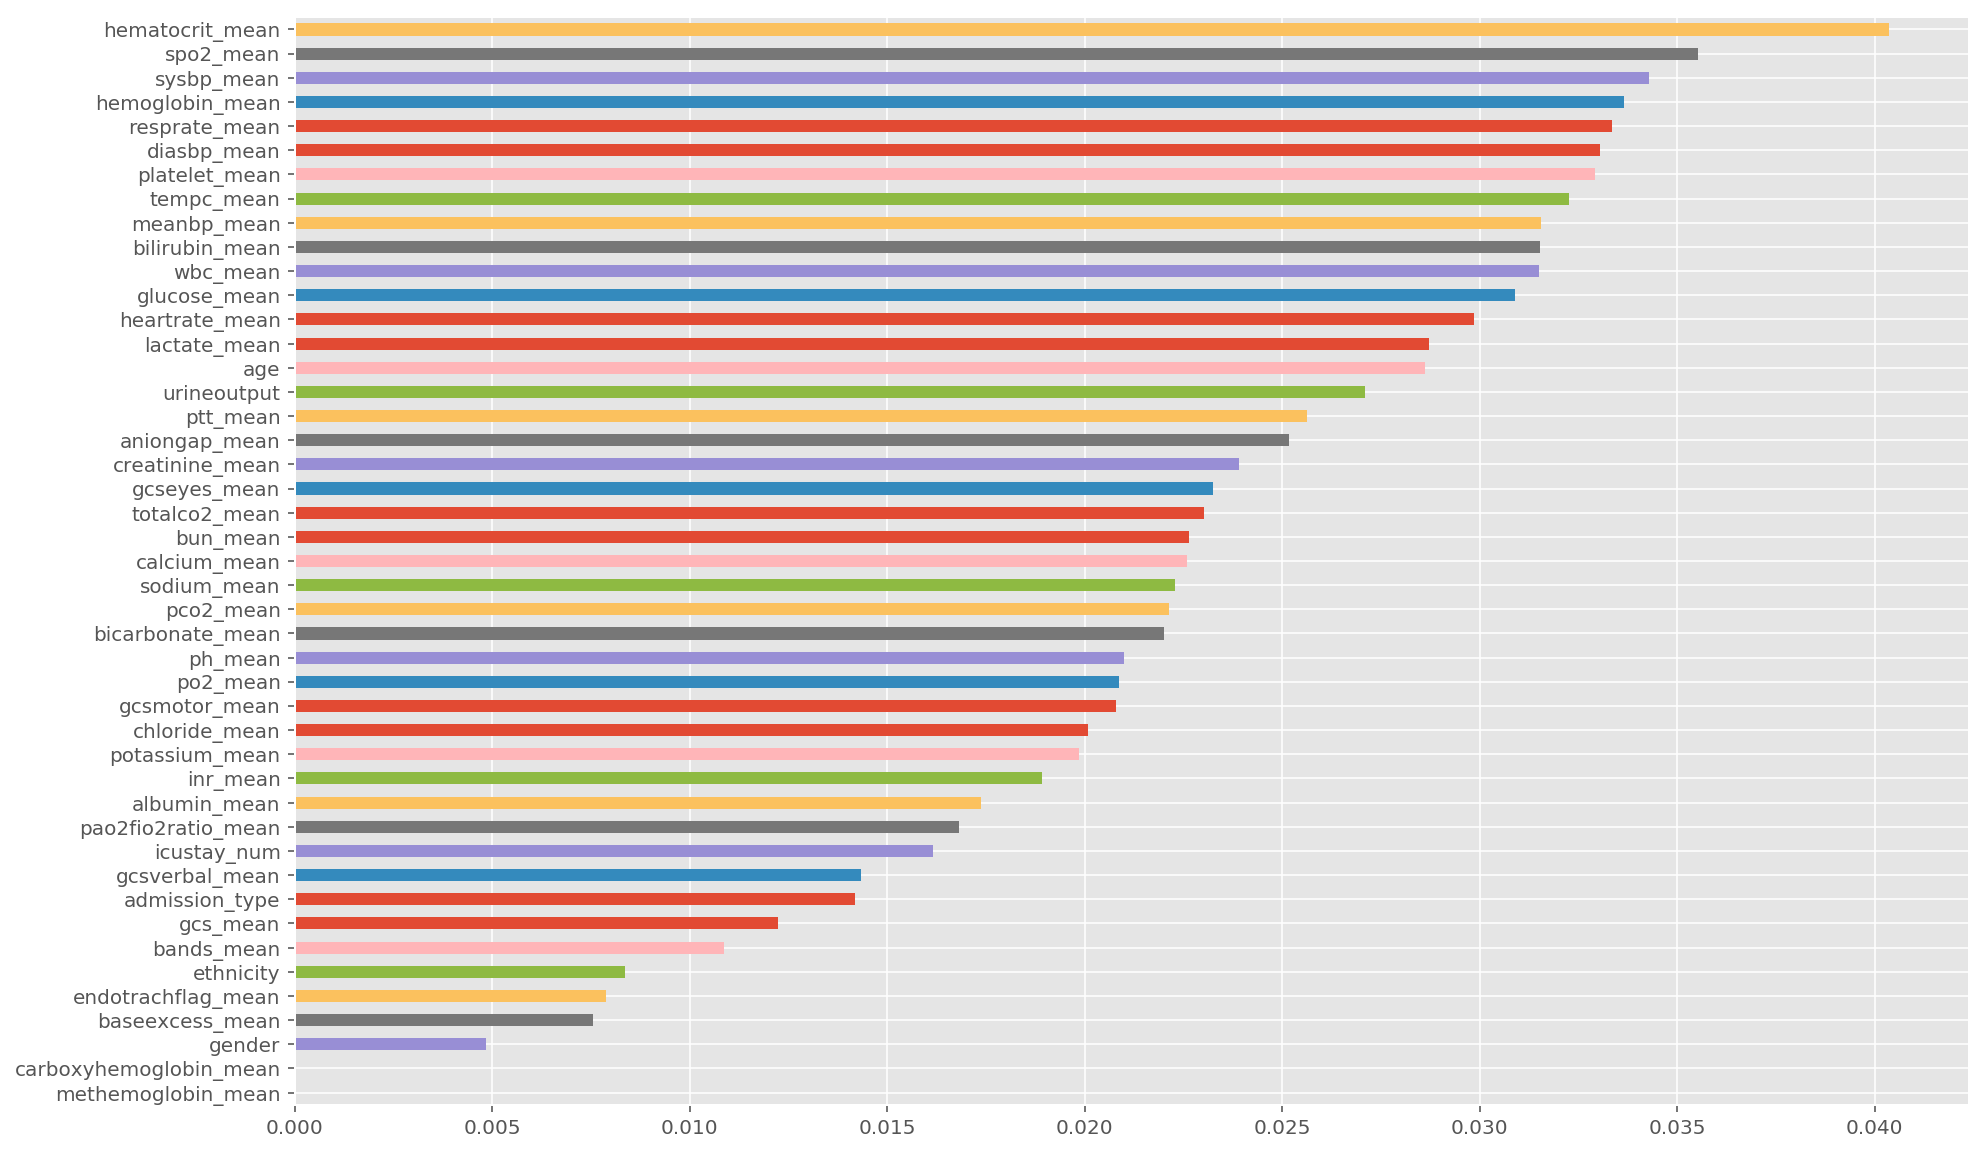

In [9]:
fig = plt.figure()
fig.set_size_inches(15,10)
    
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
print("Top 10 features")
print(feat_importances.nlargest(10))

feat_importances = feat_importances.nsmallest(50)
feat_importances.plot(kind='barh')